# **1. KHAI BÁO THƯ VIỆN**

**1.1. Thư viện Investpy, load dữ liệu chứng khoán trực tuyến.**

In [1]:
!pip install investpy
import investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 27.7 MB/s 
     |████████████████████████████████| 235 kB 66.3 MB/s 
     |████████████████████████████████| 6.4 MB 62.1 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=ec879329d6a0ff1c45882083584a3001e836e13a80e624d8c538142191cc738c
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


**1.2. Khai báo một số thư viện cần thiết.**

In [2]:
#Import thư viện
import pandas as pd 
import numpy as np 
import datetime as dt 
from datetime import datetime
import matplotlib.pyplot as plt 
plt.style.use('bmh')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential #đầu vào
from keras.layers import Dense #dau ra
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from tensorflow import keras
import pandas_datareader.data as pdr
from keras.callbacks import ModelCheckpoint  
from tensorflow.keras.models import load_model 

from sklearn.metrics import r2_score # Mức độ phù hợp
from sklearn.metrics import mean_absolute_error #Tính sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error # Tính phần trăm sai số tuyệt đối trung bình


**1.3. Kết nối Google Drive.**

In [3]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


# **2. THU THẬP DỮ LIỆU TRỰC TUYẾN**

In [4]:
#CÔNG TY CỔ PHẦN XÂY DỰNG FLC FAROS (HOSE: ROS).
start = "01/01/2020"
end   = "01/06/2022"

data_ROS = investpy.get_stock_historical_data(stock= "ROS", country= 'vietnam', from_date = start, to_date = end)   

**2.1. Tổng quan về tập dữ liệu.**

In [5]:
# Thông tin cơ bản về data.
data_ROS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 601 entries, 2020-01-02 to 2022-06-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      601 non-null    float64
 1   High      601 non-null    float64
 2   Low       601 non-null    float64
 3   Close     601 non-null    float64
 4   Volume    601 non-null    int64  
 5   Currency  601 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 32.9+ KB


In [6]:
# 5 dòng dữ liệu đầu tiên.
data_ROS.head(5)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-01-02,16100.0,16400.0,16100.0,16100.0,20432930,VND
2020-01-03,15000.0,16800.0,15000.0,15150.0,10488870,VND
2020-01-06,15150.0,15650.0,14100.0,14100.0,7523780,VND
2020-01-07,14100.0,15050.0,13150.0,15050.0,13813540,VND
2020-01-08,15100.0,15500.0,14000.0,14000.0,5601910,VND


In [7]:
# 5 dòng cuối cùng.
data_ROS.tail()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-05-26,4100.0,4100.0,4100.0,4100.0,3854300,VND
2022-05-27,3820.0,4100.0,3820.0,3900.0,26102100,VND
2022-05-30,3890.0,4170.0,3730.0,4170.0,13487800,VND
2022-05-31,4290.0,4380.0,4090.0,4110.0,7733500,VND
2022-06-01,4200.0,4200.0,3830.0,3830.0,8137100,VND


In [8]:
# Thông tin về data.
data_ROS.describe()

,Open,High,Low,Close,Volume
count,601.000000,601.000000,601.000000,601.000000,6.010000e+02
mean,5348.585691,5503.577371,5227.520799,5350.316140,1.668833e+07
std,2814.751765,2939.183392,2727.374564,2817.113665,1.574765e+07
min,2050.000000,2130.000000,2050.000000,2090.000000,1.907000e+05
25%,3120.000000,3230.000000,3070.000000,3150.000000,6.242000e+06
50%,4950.000000,5100.000000,4850.000000,4950.000000,1.170993e+07
75%,6960.000000,7100.000000,6770.000000,6880.000000,2.052630e+07
max,16400.000000,17100.000000,16100.000000,16100.000000,1.017697e+08


**2.2. Lấy giá cổ phiếu đóng cửa.**

In [9]:
data_ROS_close = data_ROS.filter(['Close'])
data_ROS_close

,Close
Date,
2020-01-02,16100.0
2020-01-03,15150.0
2020-01-06,14100.0
2020-01-07,15050.0
2020-01-08,14000.0
...,...
2022-05-26,4100.0
2022-05-27,3900.0
2022-05-30,4170.0


In [10]:
data_ROS_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 601 entries, 2020-01-02 to 2022-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   601 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


**2.3. Lấy dữ liệu 5 tháng đầu năm 2022.**

In [11]:
#Test data
start = "01/01/2022"
end   = "01/06/2022"

test_data_ROS = investpy.get_stock_historical_data(stock= "ROS", country= 'vietnam', from_date = start, to_date = end)   
test_data_ROS

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-01-04,13900.0,14300.0,13600.0,13950.0,22469100,VND
2022-01-05,13900.0,14900.0,13600.0,14900.0,46529900,VND
2022-01-06,14800.0,15800.0,14600.0,15200.0,37421700,VND
2022-01-07,15150.0,16000.0,15000.0,16000.0,29839800,VND
2022-01-10,16400.0,17100.0,14900.0,14900.0,56464600,VND
...,...,...,...,...,...,...
2022-05-26,4100.0,4100.0,4100.0,4100.0,3854300,VND
2022-05-27,3820.0,4100.0,3820.0,3900.0,26102100,VND
2022-05-30,3890.0,4170.0,3730.0,4170.0,13487800,VND


In [12]:
test_data_ROS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 2022-01-04 to 2022-06-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      99 non-null     float64
 1   High      99 non-null     float64
 2   Low       99 non-null     float64
 3   Close     99 non-null     float64
 4   Volume    99 non-null     int64  
 5   Currency  99 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.4+ KB


# **3. XỬ LÝ DỮ LIỆU.**

**3.1. Trực quan hóa giá cổ phiếu đóng cửa từ 01/01/2020 - 01/05/2022/**

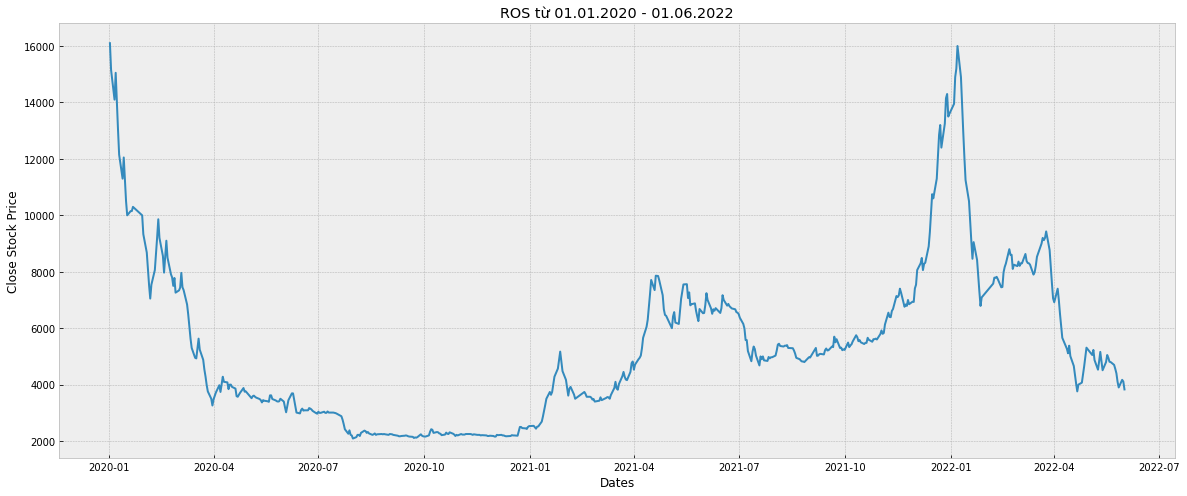

In [13]:
#Trực quan hóa giá đóng cửa 01.01.2020 - 01.06.2022.
plt.figure(figsize = (20,8))
plt.plot(data_ROS_close['Close'])
plt.title("ROS từ 01.01.2020 - 01.06.2022")
plt.xlabel('Dates')
plt.ylabel('Close Stock Price')
plt.show()

**3.2. Chia dữ liệu thành tập train và test.**

In [14]:
#Chia tập dữ liệu. Tổng 600 dòng dữ liệu. 502 tập train model. 98 tập test model.
data  = data_ROS_close.values 
train_data = data[:502] 
test_data =  data[502:]

In [15]:
len(train_data)

502

In [16]:
len(test_data)

99

**3.3. Chuẩn hóa dữ liệu, sử dụng tập train để train model.**

In [17]:
#Chuẩn hóa dữ liệu.
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(data.reshape(-1,1))
len(scaled_data)

601

In [18]:
#Chia tập train thành x_train, y_train

prediction_days = 40
x_train = [] #chứa giá trị của 40 ngày liên tiếp.
y_train = [] #chứa giá trị của ngày tiếp theo.
for x in range(prediction_days, len(train_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [19]:
x_train

[array([1.        , 0.93219129, 0.85724483, 0.92505353, 0.85010707,
        0.78229836, 0.71805853, 0.65738758, 0.71092077, 0.6538187 ,
        0.60028551, 0.56459672, 0.57530335, 0.57530335, 0.58600999,
        0.56459672, 0.51677373, 0.4703783 , 0.42755175, 0.3875803 ,
        0.35403283, 0.38900785, 0.4261242 , 0.46609565, 0.5089222 ,
        0.55460385, 0.50749465, 0.46181299, 0.41970021, 0.45895789,
        0.50035689, 0.45753034, 0.41541756, 0.40756602, 0.38615275,
        0.40613847, 0.36902213, 0.37473233, 0.38187009, 0.41898644]),
 array([0.93219129, 0.85724483, 0.92505353, 0.85010707, 0.78229836,
        0.71805853, 0.65738758, 0.71092077, 0.6538187 , 0.60028551,
        0.56459672, 0.57530335, 0.57530335, 0.58600999, 0.56459672,
        0.51677373, 0.4703783 , 0.42755175, 0.3875803 , 0.35403283,
        0.38900785, 0.4261242 , 0.46609565, 0.5089222 , 0.55460385,
        0.50749465, 0.46181299, 0.41970021, 0.45895789, 0.50035689,
        0.45753034, 0.41541756, 0.40756602, 0.

In [20]:
y_train

[0.3825838686652392,
 0.37544610992148475,
 0.33904354032833695,
 0.3133476088508209,
 0.2826552462526767,
 0.25267665952890794,
 0.22912205567451824,
 0.20413990007137758,
 0.20271234832262672,
 0.22698072805139188,
 0.25267665952890794,
 0.22483940042826553,
 0.1991434689507495,
 0.17487508922198433,
 0.15703069236259817,
 0.1356174161313348,
 0.1192005710206995,
 0.10064239828693791,
 0.08351177730192721,
 0.09921484653818702,
 0.11634546752319772,
 0.1349036402569593,
 0.11777301927194864,
 0.13633119200571023,
 0.15631691648822274,
 0.14346895074946467,
 0.1420413990007138,
 0.12491077801570308,
 0.13633119200571023,
 0.13633119200571023,
 0.13062098501070665,
 0.126338329764454,
 0.10706638115631692,
 0.10563882940756605,
 0.11063526052819414,
 0.11563169164882228,
 0.12776588151320487,
 0.11848679514632407,
 0.1192005710206995,
 0.10206995003568883,
 0.10706638115631692,
 0.10849393290506784,
 0.10563882940756605,
 0.1034975017844397,
 0.09992862241256248,
 0.09707351891506069,


In [21]:
x_train, y_train = np.array(x_train), np.array(y_train) #Chuyển dữ liệu sang 1 mảng.

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) ##Xếp dữ liệu thành mảng 1 chiều.
y_train = np.reshape(y_train,(y_train.shape[0], 1))

In [22]:
x_train

array([[[1.        ],
        [0.93219129],
        [0.85724483],
        ...,
        [0.37473233],
        [0.38187009],
        [0.41898644]],

       [[0.93219129],
        [0.85724483],
        [0.92505353],
        ...,
        [0.38187009],
        [0.41898644],
        [0.38258387]],

       [[0.85724483],
        [0.92505353],
        [0.85010707],
        ...,
        [0.41898644],
        [0.38258387],
        [0.37544611]],

       ...,

       [[0.26481085],
        [0.26695218],
        [0.28836545],
        ...,
        [0.73590293],
        [0.79657388],
        [0.8608137 ]],

       [[0.26695218],
        [0.28836545],
        [0.31834404],
        ...,
        [0.79657388],
        [0.8608137 ],
        [0.87152034]],

       [[0.28836545],
        [0.31834404],
        [0.3076374 ],
        ...,
        [0.8608137 ],
        [0.87152034],
        [0.81441827]]])

In [23]:
y_train

array([[0.38258387],
       [0.37544611],
       [0.33904354],
       [0.31334761],
       [0.28265525],
       [0.25267666],
       [0.22912206],
       [0.2041399 ],
       [0.20271235],
       [0.22698073],
       [0.25267666],
       [0.2248394 ],
       [0.19914347],
       [0.17487509],
       [0.15703069],
       [0.13561742],
       [0.11920057],
       [0.1006424 ],
       [0.08351178],
       [0.09921485],
       [0.11634547],
       [0.13490364],
       [0.11777302],
       [0.13633119],
       [0.15631692],
       [0.14346895],
       [0.1420414 ],
       [0.12491078],
       [0.13633119],
       [0.13633119],
       [0.13062099],
       [0.12633833],
       [0.10706638],
       [0.10563883],
       [0.11063526],
       [0.11563169],
       [0.12776588],
       [0.1184868 ],
       [0.11920057],
       [0.10206995],
       [0.10706638],
       [0.10849393],
       [0.10563883],
       [0.1034975 ],
       [0.09992862],
       [0.09707352],
       [0.09136331],
       [0.097

# **4. BUILT MODEL**

**4.1 Model**

In [24]:
model = Sequential()
model.add(LSTM(units = 128,input_shape=(x_train.shape[1],1),return_sequences = True))
model.add(LSTM(units = 64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam',)

**4.2. Huấn luyện model**

In [25]:
save_model = "save_model.hdf5"
best_model = ModelCheckpoint(save_model,monitor='loss',verboss=2,save_best_only = True,model="auto")
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])


Epoch 1/100
10/10 - 5s - loss: 0.0192 - 5s/epoch - 468ms/step
Epoch 2/100
10/10 - 1s - loss: 0.0062 - 852ms/epoch - 85ms/step
Epoch 3/100
10/10 - 1s - loss: 0.0039 - 864ms/epoch - 86ms/step
Epoch 4/100
10/10 - 1s - loss: 0.0034 - 846ms/epoch - 85ms/step
Epoch 5/100
10/10 - 1s - loss: 0.0033 - 835ms/epoch - 84ms/step
Epoch 6/100
10/10 - 1s - loss: 0.0026 - 854ms/epoch - 85ms/step
Epoch 7/100
10/10 - 1s - loss: 0.0020 - 808ms/epoch - 81ms/step
Epoch 8/100
10/10 - 1s - loss: 0.0024 - 817ms/epoch - 82ms/step
Epoch 9/100
10/10 - 1s - loss: 0.0026 - 808ms/epoch - 81ms/step
Epoch 10/100
10/10 - 1s - loss: 0.0025 - 805ms/epoch - 81ms/step
Epoch 11/100
10/10 - 1s - loss: 0.0020 - 802ms/epoch - 80ms/step
Epoch 12/100
10/10 - 1s - loss: 0.0023 - 767ms/epoch - 77ms/step
Epoch 13/100
10/10 - 1s - loss: 0.0028 - 790ms/epoch - 79ms/step
Epoch 14/100
10/10 - 1s - loss: 0.0018 - 804ms/epoch - 80ms/step
Epoch 15/100
10/10 - 1s - loss: 0.0021 - 830ms/epoch - 83ms/step
Epoch 16/100
10/10 - 1s - loss: 0.00

In [26]:
#Tải model thực hiện train cho y_train.
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model('save_model.hdf5')

# Thực hiện dự đoán cho y train.
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

# **5. THỰC HIỆN ÁP DỤNG MODEL DỰ ĐOÁN CHO TẬP TEST.**

**5.1. Xử lý dữ liệu cho tập Test**

In [27]:
#Xử lý dữ liệu test
test = data_ROS_close[len(train_data)-40:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(40,test.shape[0]):
    x_test.append(sc_test[i-40:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

**5.2. Thực hiện áp dụng model dự đoán cho tập Test.**

In [28]:
#Thực hiện áp dụng model dự đoán cho tập test.
y_test = data[502:] #giá thực tế.
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán


# **6. HIỂN THỊ KẾT QUẢ.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


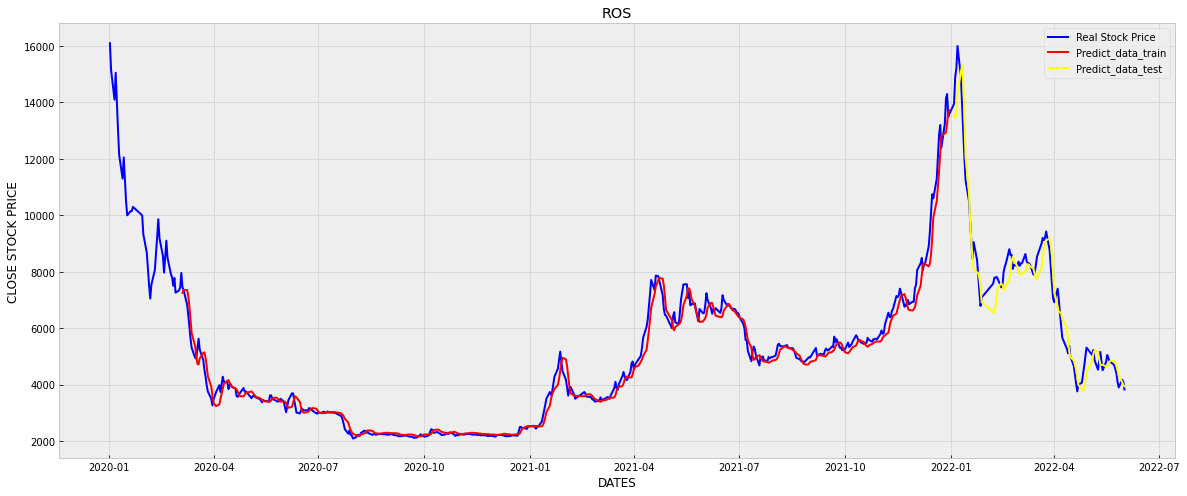

In [29]:
#Trực quan hóa bằng biểu đồ.
new_train_data = data_ROS_close[40:502]
new_test_data = data_ROS_close[502:]
plt.figure(figsize = (20,8))

plt.plot(data_ROS_close, label = 'Real Stock Price',color = 'blue') #Đường giá thực

new_train_data['Predic'] = y_train_predict #Dữ liệu do model dự đoán tập train.
plt.plot(new_train_data['Predic'],label='Predict_data_train',color='red') #Vẽ đường giá dự báo train.

new_test_data['Predic'] = y_test_predict #Dữ liệu do model dự đoán tập test.
plt.plot(new_test_data["Predic"],label='Predict_data_test',color='yellow') #Vẽ đường giá dự báo test.

plt.title('ROS')
plt.xlabel('DATES') 
plt.ylabel('CLOSE STOCK PRICE') 
plt.legend() 
plt.show()

# **7. KIỂM TRA ĐỘ CHÍNH XÁC CỦA MODEL**

In [30]:
new_train_data 

,Close,Predic
Date,,
2020-03-05,7450.0,7251.296387
2020-03-06,7350.0,7355.658691
2020-03-09,6840.0,7354.507324
2020-03-10,6480.0,7145.596680
2020-03-11,6050.0,6778.306152
...,...,...
2021-12-27,13250.0,12904.603516
2021-12-28,14150.0,12947.661133
2021-12-29,14300.0,13257.936523


In [31]:
new_test_data

,Close,Predic
Date,,
2022-01-04,13950.0,13555.031250
2022-01-05,14900.0,13440.157227
2022-01-06,15200.0,13735.954102
2022-01-07,16000.0,14285.271484
2022-01-10,14900.0,15090.657227
...,...,...
2022-05-26,4100.0,4522.829590
2022-05-27,3900.0,4322.103027
2022-05-30,4170.0,4095.301514


**Độ chính xác tập train.**

In [32]:
print('Độ chính xác:',r2_score(y_train,y_train_predict))
print('Sai số tuyệt đối trung bình:',mean_absolute_error(y_train,y_train_predict))
print('Phần trăm sai số tuyệt đối trung bình:',mean_absolute_percentage_error(y_train,y_train_predict))

Độ chính xác: 0.9781501908018684
Sai số tuyệt đối trung bình: 210.67637204917477
Phần trăm sai số tuyệt đối trung bình: 0.04270916504219531


**Độ chính xác tập test.**

In [33]:
print('Độ chính xác:',r2_score(y_test,y_test_predict))
print('Sai số tuyệt đối trung bình:',mean_absolute_error(y_test,y_test_predict))
print('Phần trăm sai số tuyệt đối trung bình:',mean_absolute_percentage_error(y_test,y_test_predict))

Độ chính xác: 0.9490206302365889
Sai số tuyệt đối trung bình: 472.00663372001264
Phần trăm sai số tuyệt đối trung bình: 0.06374178220048814
